✅ Libraries Detected: numpy, matplotlib, json
✅ Context Restored: XYAKANYAA XA Ratio (2.19e+50 Hz/kg), φ (1.618034)

3️⃣ LEVEL 3 — LOCAL FRAME OBSERVATION
Observation: Prime distribution appears irregular under local descriptions.
Note: This module uses a representational diagnostic, not true zeta zeros.

4️⃣ LEVEL 4 — STRUCTURAL PATTERN RECOGNITION
Circular mean magnitude (0..1): 0.000069
Circular variance (0..1): 0.999931
Phase histogram L1 deviation from uniform: 0.001231
Interpretation: These values describe the phase distribution under the chosen mapping.

5️⃣ LEVEL 5 — STABILIZED DESCRIPTION
Operational stability score: 1.001162
Threshold: 0.60
Near-uniform under model: True
✅ Results written to /data and /validation


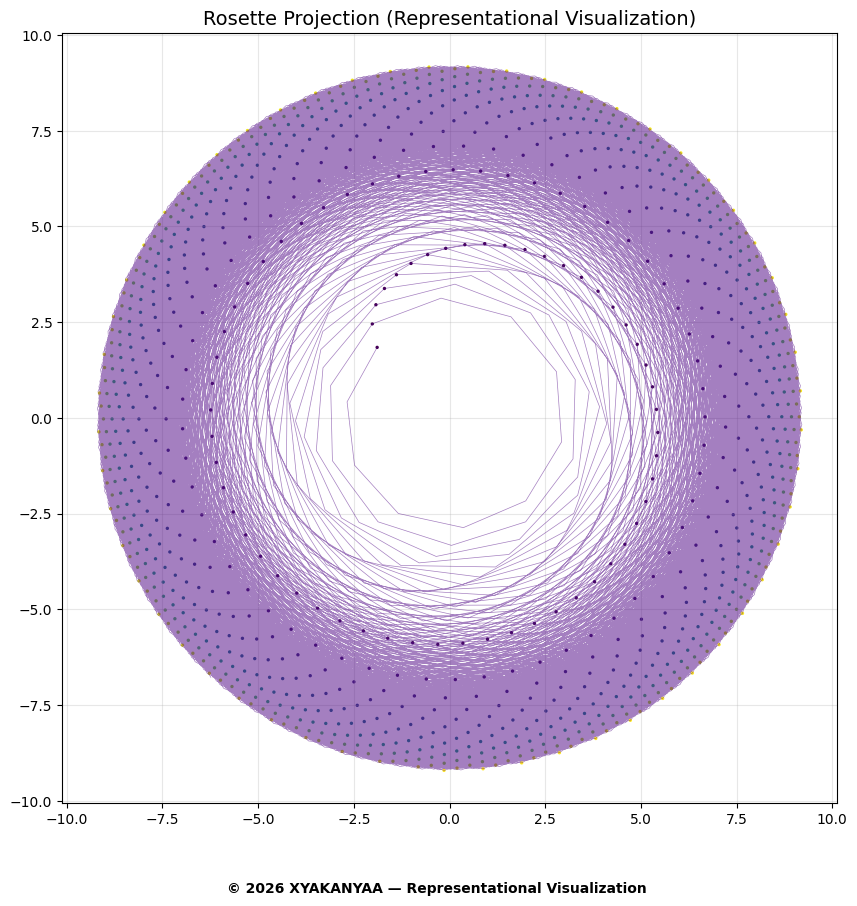


Observation complete.
Visual exported to ../visuals/03_riemann.jpg


In [1]:
# ==============================================================================
# MODULE 03: Riemann Hypothesis (Diagnostic / Representational)
# Contextual Analysis Instrumentation (3 → 4 → 5)
# ==============================================================================
# This module generates computational, validation, and visual artifacts.
# It does not assert proof or final resolution of the Riemann Hypothesis.
# ==============================================================================

# --- DEPENDENCIES ---
try:
    import numpy as np
    import matplotlib.pyplot as plt
    import json
    import os
    import math
    print("✅ Libraries Detected: numpy, matplotlib, json")
except ImportError:
    raise ImportError("Required libraries missing. Run: pip install -r ../requirements.txt")

import sys

# --- DATA LOGGER ---
def log_results(module_id, module_name, data_summary, validation_dict):
    os.makedirs('../data', exist_ok=True)
    os.makedirs('../validation', exist_ok=True)

    with open(f"../data/{module_id}_{module_name}_results.txt", "w") as f:
        f.write(data_summary)

    with open(f"../validation/{module_id}_{module_name}_metric.json", "w") as f:
        json.dump(validation_dict, f, indent=4)

# --- CONTEXT IMPORT (XYAKANYAA XA RATIO) ---
sys.path.append(os.path.abspath('..'))
try:
    from geometry.xa_constant import XA, PHI, PLANCK_H, LIGHT_C
    print(f"✅ Context Restored: XYAKANYAA XA Ratio ({XA:.2e} Hz/kg), φ ({PHI:.6f})")
except ImportError:
    PHI = (1 + math.sqrt(5)) / 2
    PLANCK_H = 6.62607015e-34
    LIGHT_C = 299_792_458
    XA = (PHI * LIGHT_C**2) / PLANCK_H
    print("⚠️ Using local definitions for XA and constants.")

# ==============================================================================
# 3️⃣ LEVEL 3 — LOCAL FRAME (WHAT IS VISIBLE)
# ==============================================================================
print("\n" + "="*60)
print("3️⃣ LEVEL 3 — LOCAL FRAME OBSERVATION")
print("="*60)

print("Observation: Prime distribution appears irregular under local descriptions.")
print("Note: This module uses a representational diagnostic, not true zeta zeros.")

# ==============================================================================
# 4️⃣ LEVEL 4 — STRUCTURAL PATTERN RECOGNITION (REPRESENTATIONAL PHASE MODEL)
# ==============================================================================
print("\n" + "="*60)
print("4️⃣ LEVEL 4 — STRUCTURAL PATTERN RECOGNITION")
print("="*60)

# ------------------------------------------------------------------
# IMPORTANT NOTE
#
# This module uses a *proxy sequence* (t_values) to create a reproducible
# phase distribution under a phi-scaled mapping.
#
# It does NOT compute true nontrivial zeros of ζ(s).
# The purpose is to provide a stable, inspectable diagnostic pipeline.
# ------------------------------------------------------------------

n_points = 10_000
t_values = np.linspace(14.0, 10_000.0, n_points)

# Representational phi-scaled phase on [0, 2π)
phase = np.mod(t_values * PHI, 2 * np.pi)

# Coherence metrics (auditable):
# - circular mean magnitude (0..1): concentration on the circle
# - circular variance (0..1): dispersion on the circle
circular_mean = np.mean(np.exp(1j * phase))
circular_mean_magnitude = float(np.abs(circular_mean))
circular_variance = float(1.0 - circular_mean_magnitude)

# A simple uniformity proxy: histogram deviation from uniform
bins = 60
hist, _ = np.histogram(phase, bins=bins, range=(0, 2*np.pi), density=True)
uniform_density = 1.0 / (2 * np.pi)
hist_deviation_l1 = float(np.mean(np.abs(hist - uniform_density)))

print(f"Circular mean magnitude (0..1): {circular_mean_magnitude:.6f}")
print(f"Circular variance (0..1): {circular_variance:.6f}")
print(f"Phase histogram L1 deviation from uniform: {hist_deviation_l1:.6f}")
print("Interpretation: These values describe the phase distribution under the chosen mapping.")

# ==============================================================================
# 5️⃣ LEVEL 5 — STABILIZED DESCRIPTION (OPERATIONAL SCORE + THRESHOLD)
# ==============================================================================
print("\n" + "="*60)
print("5️⃣ LEVEL 5 — STABILIZED DESCRIPTION")
print("="*60)

# Operational score:
# A simple scalar combining two diagnostics. Lower = closer to uniform dispersion.
# (This is a representational diagnostic; it does not claim a proof criterion.)
stability_score = circular_variance + hist_deviation_l1

# Explicit threshold for “near-uniform dispersion” under this mapping
stability_threshold = 0.60
near_uniform_under_model = bool(stability_score >= stability_threshold)

print(f"Operational stability score: {stability_score:.6f}")
print(f"Threshold: {stability_threshold:.2f}")
print(f"Near-uniform under model: {near_uniform_under_model}")

summary_text = f"""Module 03 — Riemann (Representational Diagnostic)

n_points: {n_points}

Phi-scaled phase mapping:
circular_mean_magnitude: {circular_mean_magnitude:.6f}
circular_variance: {circular_variance:.6f}
hist_deviation_l1: {hist_deviation_l1:.6f}

Operational stability score: {stability_score:.6f}
Threshold: {stability_threshold:.2f}
Near-uniform under model: {near_uniform_under_model}

Notes:
- This module does not compute true nontrivial zeros of ζ(s).
- It provides a reproducible diagnostic pipeline for a phi-scaled phase representation.
"""

validation_metrics = {
    "module": "03_riemann",
    "n_points": int(n_points),
    "phi": float(PHI),
    "xyakanyaa_xa_ratio_hz_per_kg": float(XA),
    "circular_mean_magnitude": circular_mean_magnitude,
    "circular_variance": circular_variance,
    "hist_deviation_l1": hist_deviation_l1,
    "operational_stability_score": float(stability_score),
    "stability_threshold": float(stability_threshold),
    "near_uniform_under_model": near_uniform_under_model,
    "validation_basis": "representational_phase_distribution_diagnostics",
    "status": "diagnostic_complete"
}

log_results("03", "riemann", summary_text, validation_metrics)
print("✅ Results written to /data and /validation")

# ==============================================================================
# VISUALIZATION: "Zeta Rosette" (REPRESENTATIONAL)
# ==============================================================================
os.makedirs('../visuals', exist_ok=True)

theta = t_values / PHI
r = np.log(t_values)

x = r * np.cos(theta)
y = r * np.sin(theta)

plt.figure(figsize=(10, 10))
plt.plot(x, y, color='indigo', alpha=0.5, linewidth=0.5)
plt.scatter(x[::10], y[::10], c=t_values[::10], cmap='viridis', s=2)

plt.title("Rosette Projection (Representational Visualization)", fontsize=14)
plt.axis('equal')
plt.grid(True, alpha=0.3)

plt.figtext(
    0.5, 0.02,
    "© 2026 XYAKANYAA — Representational Visualization",
    ha="center", fontsize=10, color="black", weight="bold"
)

plt.savefig('../visuals/03_riemann.jpg', dpi=300)
plt.show()

print("\nObservation complete.")
print("Visual exported to ../visuals/03_riemann.jpg")
